# Nighttime Lights in Myanmar


**Data & Methodology Note:**


This notebook uses VIIRS Nighttime Lights Collection 2 monthly and annual products. For all analyses and visualizations where the year 2025 is shown, monthly data are aggregated to the annual level to ensure completeness, as the official annual product for 2025 may not be available yet. All other years use the official annual product where possible.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

from pathlib import Path
import os
import glob
from wbpyplot import wb_plot

In [3]:
# Helpers shared across plots
import pandas as pd

_DEF_EXCLUDE = {"year","month","date","adm0","adm1","adm2","adm3","adm4","name","code","id"}

def pick_value_column(df: pd.DataFrame):
    prefer = [
        "ntl_sum", "ntl_mean"
    ]
    lower_map = {c.lower(): c for c in df.columns}
    for key in prefer:
        if key in lower_map:
            return lower_map[key]
    num_cols = [c for c in df.select_dtypes("number").columns if c.lower() not in _DEF_EXCLUDE]
    return num_cols[0] if num_cols else None

In [4]:
DATA_FOLDER = Path('../../../data/')
NTL_FOLDER = DATA_FOLDER / 'ntl'/'collection2'
print(NTL_FOLDER)

../../../data/ntl/collection2


In [5]:
ntl_annual_adm0 = pd.DataFrame()

for file in glob.glob(str(NTL_FOLDER / '*adm0_annual*.csv')):
    df = pd.read_csv(file)
    ntl_annual_adm0 = pd.concat([ntl_annual_adm0, df], ignore_index=True)

ntl_annual_adm1 = pd.DataFrame()

for file in glob.glob(str(NTL_FOLDER / '*adm1_annual*.csv')):
    df = pd.read_csv(file)
    ntl_annual_adm1 = pd.concat([ntl_annual_adm1, df], ignore_index=True)

ntl_annual_adm2 = pd.DataFrame()

for file in glob.glob(str(NTL_FOLDER / '*adm2_annual*.csv')):
    df = pd.read_csv(file)
    ntl_annual_adm2 = pd.concat([ntl_annual_adm2, df], ignore_index=True)

ntl_annual_adm3 = pd.DataFrame()

for file in glob.glob(str(NTL_FOLDER / '*adm3_annual*.csv')):
    df = pd.read_csv(file)
    ntl_annual_adm3 = pd.concat([ntl_annual_adm3, df], ignore_index=True)

ntl_annual_adm4 = pd.DataFrame()

for file in glob.glob(str(NTL_FOLDER / '*adm4_annual*.csv')):
    df = pd.read_csv(file)
    ntl_annual_adm4 = pd.concat([ntl_annual_adm4, df], ignore_index=True)

ntl_monthly_adm0 = pd.DataFrame()

for file in glob.glob(str(NTL_FOLDER / '*adm0_monthly*.csv')):
    df = pd.read_csv(file)
    ntl_monthly_adm0 = pd.concat([ntl_monthly_adm0, df], ignore_index=True)

ntl_monthly_adm1 = pd.DataFrame()

for file in glob.glob(str(NTL_FOLDER / '*adm1_monthly*.csv')):
    df = pd.read_csv(file)
    ntl_monthly_adm1 = pd.concat([ntl_monthly_adm1, df], ignore_index=True)

ntl_monthly_adm2 = pd.DataFrame()

for file in glob.glob(str(NTL_FOLDER / '*adm2_monthly*.csv')):
    df = pd.read_csv(file)
    ntl_monthly_adm2 = pd.concat([ntl_monthly_adm2, df], ignore_index=True)

ntl_monthly_adm3 = pd.DataFrame()

for file in glob.glob(str(NTL_FOLDER / '*adm3_monthly*.csv')):
    df = pd.read_csv(file)
    ntl_monthly_adm3 = pd.concat([ntl_monthly_adm3, df], ignore_index=True)

ntl_monthly_adm4 = pd.DataFrame()

for file in glob.glob(str(NTL_FOLDER / '*adm4_monthly*.csv')):
    df = pd.read_csv(file)
    ntl_monthly_adm4 = pd.concat([ntl_monthly_adm4, df], ignore_index=True)


ntl_annual_adm0.drop_duplicates(inplace=True)
ntl_annual_adm1.drop_duplicates(inplace=True)
ntl_annual_adm2.drop_duplicates(inplace=True)
ntl_annual_adm3.drop_duplicates(inplace=True)
ntl_annual_adm4.drop_duplicates(inplace=True)

ntl_monthly_adm0.drop_duplicates(inplace=True)
ntl_monthly_adm1.drop_duplicates(inplace=True)
ntl_monthly_adm2.drop_duplicates(inplace=True)
ntl_monthly_adm3.drop_duplicates(inplace=True)
ntl_monthly_adm4.drop_duplicates(inplace=True)


/var/folders/gs/_227cnyd0pq1fr817_0jbcyw0000gp/T/ipykernel_87311/114900510.py:28: DtypeWarning: Columns (4,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
/var/folders/gs/_227cnyd0pq1fr817_0jbcyw0000gp/T/ipykernel_87311/114900510.py:58: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
/var/folders/gs/_227cnyd0pq1fr817_0jbcyw0000gp/T/ipykernel_87311/114900510.py:58: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
/var/folders/gs/_227cnyd0pq1fr817_0jbcyw0000gp/T/ipykernel_87311/114900510.py:58: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
/var/folders/gs/_227cnyd0pq1fr817_0jbcyw0000gp/T/ipykernel_87311/114900510.py:58: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_m

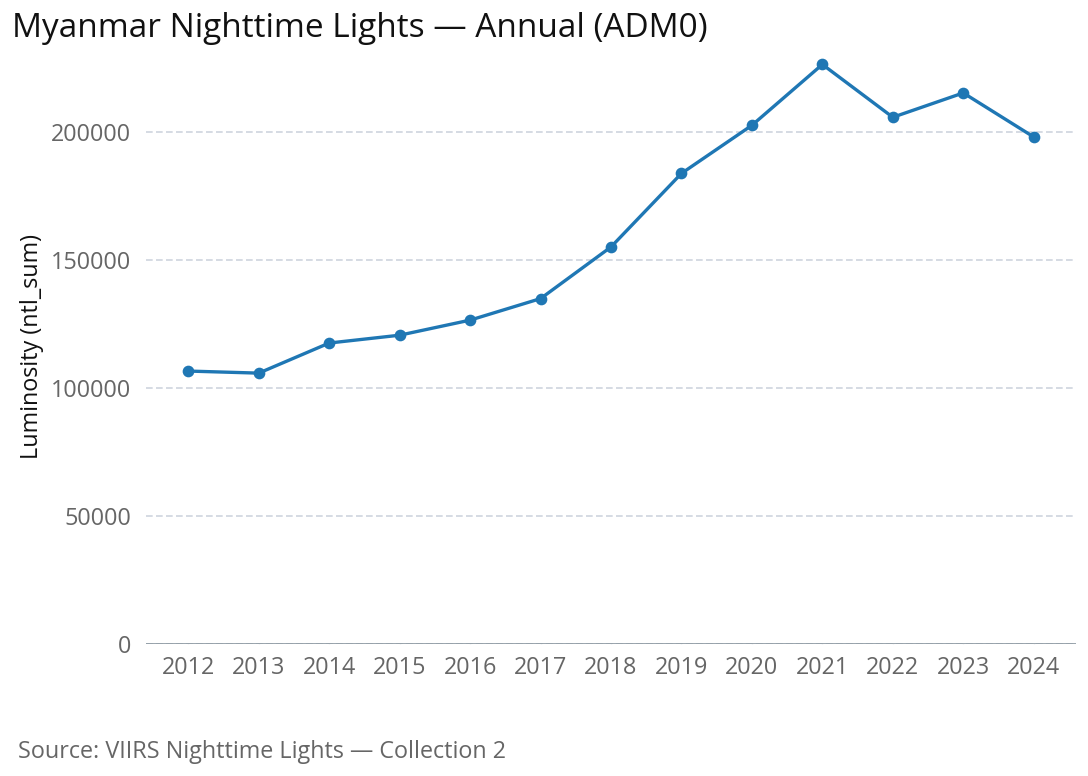

In [6]:
# Plot NTL annual trend at ADM0 (no earthquake marker)
from wbpyplot import wb_plot
import numpy as np

# Prepare annual data
annual_df = ntl_annual_adm0.copy()
# Derive year from known 'date' column present in CSV header
if 'date' in annual_df.columns:
    annual_df['year'] = pd.to_datetime(annual_df['date']).dt.year
    year_col = 'year'
else:
    year_col = next((c for c in ['year','Year','YEAR','yr','Yr','YR'] if c in annual_df.columns), None)

# Prefer ntl_sum explicitly
val_col = 'ntl_sum' if 'ntl_sum' in annual_df.columns else pick_value_column(annual_df)
assert year_col is not None and val_col is not None, f"Could not determine year/value columns. year={year_col}, value={val_col}"

annual = (annual_df[[year_col, val_col]]
          .dropna()
          .groupby(year_col, as_index=False)[val_col].mean()
          .sort_values(year_col))

source_text = "Source: VIIRS Nighttime Lights — Collection 2"

@wb_plot(title="Myanmar Nighttime Lights — Annual (ADM0)",
         subtitle=None,
         note=source_text)
def plot_annual(*args):
    # Accept (ax) or (fig, ax) or list/array of axes
    axes = args[0] if len(args) == 1 else (args[1] if len(args) >= 2 else None)
    if axes is None:
        raise ValueError("wb_plot did not provide axes")
    # Normalize to a single Axes
    if hasattr(axes, 'plot') and hasattr(axes, 'bar'):
        ax = axes
    else:
        try:
            arr = np.asarray(axes).ravel()
            ax = arr[0]
        except Exception:
            ax = axes[0] if isinstance(axes, (list, tuple)) else axes
    # Draw
    ax.plot(annual[year_col], annual[val_col], marker="o", linewidth=2, color="#1f77b4", label=val_col)
    ax.set_xlabel("Year")
    ax.set_ylabel("Luminosity (ntl_sum)")
    # Show every year tick
    years = annual[year_col].astype(int).tolist()
    ax.set_xticks(years)
    ax.set_xticklabels([str(y) for y in years], rotation=0)
    ax.legend()

plot_annual()

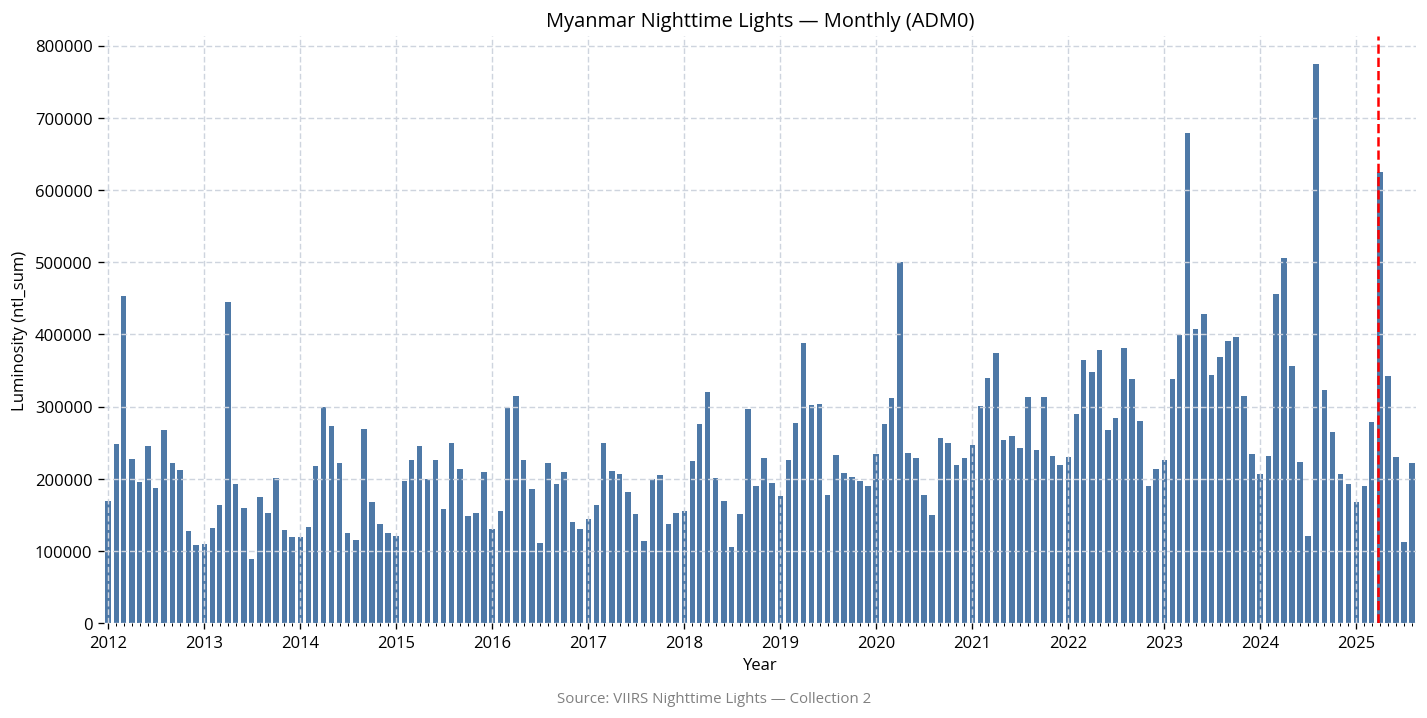

In [7]:
# Plot NTL monthly bar chart at ADM0 using Matplotlib (no decorator)
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Prepare monthly data
monthly_df = ntl_monthly_adm0.copy()

# Build a date column
if 'date' in monthly_df.columns:
    date_col = 'date'
else:
    year_cand = next((c for c in ["year","Year","YEAR"] if c in monthly_df.columns), None)
    month_cand = next((c for c in ["month","Month","MONTH","mon","Mon","MON"] if c in monthly_df.columns), None)
    if year_cand and month_cand:
        monthly_df['date'] = pd.to_datetime(dict(year=monthly_df[year_cand], month=monthly_df[month_cand], day=1))
        date_col = 'date'
    else:
        raise ValueError('Could not determine date column for monthly data')

# Prefer ntl_sum explicitly
val_col_m = 'ntl_sum' if 'ntl_sum' in monthly_df.columns else pick_value_column(monthly_df)
assert val_col_m is not None, 'Could not determine value column for monthly data'

monthly = (monthly_df[[date_col, val_col_m]]
           .dropna()
           .copy())
monthly[date_col] = pd.to_datetime(monthly[date_col])
monthly = monthly.sort_values(date_col)

# Plot
fig, ax = plt.subplots(figsize=(12, 6), dpi=120)
ax.bar(monthly[date_col], monthly[val_col_m], width=20, color="#4e79a7")

# Earthquake marker at 2025-03-25
ax.axvline(pd.Timestamp('2025-03-25'), color='red', linestyle='--', linewidth=1.5, zorder=3)

# X-axis: yearly major ticks with monthly minor ticks
ax.xaxis.set_major_locator(mdates.YearLocator(base=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_minor_locator(mdates.MonthLocator(interval=1))
ax.tick_params(axis='x', which='major', rotation=0, labelsize=10)
ax.tick_params(axis='x', which='minor', length=2, labelbottom=False)

# Pad x-limits to avoid clipping bar edges
xmin = monthly[date_col].min() - pd.Timedelta(days=15)
xmax = monthly[date_col].max() + pd.Timedelta(days=15)
ax.set_xlim(xmin, xmax)

# Labels and title
ax.set_title('Myanmar Nighttime Lights — Monthly (ADM0)')
ax.set_xlabel('Year')
ax.set_ylabel('Luminosity (ntl_sum)')

# Source at bottom
fig.text(0.5, 0.01, 'Source: VIIRS Nighttime Lights — Collection 2', ha='center', va='bottom', fontsize=9, color='gray')

plt.tight_layout(rect=[0, 0.03, 1, 1])
plt.show()

In [8]:
# Functions to compute percentage changes for NTL (annual and monthly)
import pandas as pd
from typing import Optional, Union, Literal

def annual_ntl_pct_change(df: pd.DataFrame,
                          year_col: str = 'year',
                          value_col: Optional[str] = None,
                          baseline_year: Optional[int] = None,
                          current_year: Optional[int] = None,
                          date_col: Optional[str] = None,
                          mode: Literal['baseline','yoy','baseline_series'] = 'baseline',
                          baseline_years: Optional[Union[tuple, list, range]] = None) -> pd.DataFrame:
    """
    Compute percentage differences for annual NTL data.

    Modes:
    - mode='baseline' (default): percentage change (current - baseline) / baseline * 100
      using either a single baseline_year or a baseline_years range/list (mean over that period),
      with current_year (default: max year). Returns a single-row DataFrame.
    - mode='yoy': year-over-year per-year changes vs previous year for the whole series.
      Returns [year, value, prev_year_value, pct_change].
    - mode='baseline_series': compare every observed year to a baseline mean computed from
      baseline_years (range/list/tuple). Returns [year, value, baseline_period, baseline_value, pct_change].
    """
    if value_col is None:
        value_col = pick_value_column(df)
    if value_col is None:
        raise ValueError('Could not determine value column')

    work = df.copy()

    # Establish a year column
    detected_year_col = None
    if date_col and date_col in work.columns:
        work['year'] = pd.to_datetime(work[date_col]).dt.year
        detected_year_col = 'year'
    elif 'date' in work.columns:
        work['year'] = pd.to_datetime(work['date']).dt.year
        detected_year_col = 'year'
    elif year_col in work.columns:
        detected_year_col = year_col
    else:
        for cand in ['year', 'Year', 'YEAR', 'yr', 'Yr', 'YR']:
            if cand in work.columns:
                detected_year_col = cand
                break
        if detected_year_col is None:
            raise ValueError('Could not determine year column from data; provide date_col or year_col')

    # Aggregate by year to ensure one value per year
    agg = (work[[detected_year_col, value_col]]
           .dropna()
           .groupby(detected_year_col, as_index=False)[value_col].mean()
           .sort_values(detected_year_col))

    # Normalize column name for downstream logic
    agg = agg.rename(columns={detected_year_col: 'year'})

    if mode == 'yoy':
        agg = agg.sort_values('year').reset_index(drop=True)
        agg['prev_year_value'] = agg[value_col].shift(1)
        def safe_pct(curr, prev):
            try:
                return (curr - prev) / prev * 100 if pd.notnull(prev) and prev != 0 else float('nan')
            except Exception:
                return float('nan')
        agg['pct_change'] = agg.apply(lambda r: safe_pct(r[value_col], r['prev_year_value']), axis=1)
        return agg[['year', value_col, 'prev_year_value', 'pct_change']]

    if mode == 'baseline_series':
        if baseline_years is None:
            raise ValueError("baseline_series mode requires baseline_years (tuple/list/range)")
        # Normalize baseline_years into list
        if isinstance(baseline_years, range):
            years_list = list(baseline_years)
        elif isinstance(baseline_years, tuple) and len(baseline_years) == 2:
            start, end = baseline_years
            if start > end:
                start, end = end, start
            years_list = list(range(int(start), int(end) + 1))
        elif isinstance(baseline_years, (list, set)):
            years_list = sorted(int(y) for y in baseline_years)
        else:
            raise ValueError('baseline_years must be a tuple(start,end), list, set, or range')
        base_rows = agg.loc[agg['year'].isin(years_list)]
        if base_rows.empty:
            raise ValueError(f"None of the baseline years {years_list} found in data")
        baseline_val = float(base_rows[value_col].mean())
        baseline_period = f"{years_list[0]}-{years_list[-1]}" if len(years_list) > 1 else str(years_list[0])
        def safe_pct(curr, basev):
            try:
                return (curr - basev) / basev * 100 if pd.notnull(basev) and basev != 0 else float('nan')
            except Exception:
                return float('nan')
        out = agg[['year', value_col]].copy()
        out['baseline_value'] = baseline_val
        out['baseline_period'] = baseline_period
        out['pct_change'] = out.apply(lambda r: safe_pct(r[value_col], baseline_val), axis=1)
        return out[['year', value_col, 'baseline_period', 'baseline_value', 'pct_change']]

    # Default: baseline (single result)
    if current_year is None:
        current_year = int(agg['year'].max())
    curr_row = agg.loc[agg['year'] == current_year]
    if curr_row.empty:
        raise ValueError(f"Current year ({current_year}) not found in data")
    current_val = float(curr_row.iloc[0][value_col])

    baseline_period = None
    baseline_n_years = None

    if baseline_years is not None:
        if isinstance(baseline_years, range):
            years_list = list(baseline_years)
        elif isinstance(baseline_years, tuple) and len(baseline_years) == 2:
            start, end = baseline_years
            if start > end:
                start, end = end, start
            years_list = list(range(int(start), int(end) + 1))
        elif isinstance(baseline_years, (list, set)):
            years_list = sorted(int(y) for y in baseline_years)
        else:
            raise ValueError('baseline_years must be a tuple(start,end), list, set, or range')
        base_rows = agg.loc[agg['year'].isin(years_list)]
        if base_rows.empty:
            raise ValueError(f"None of the baseline years {years_list} found in data")
        baseline_val = float(base_rows[value_col].mean())
        baseline_period = f"{years_list[0]}-{years_list[-1]}" if len(years_list) > 1 else str(years_list[0])
        baseline_n_years = len(base_rows)
        baseline_year_single = years_list[0]
    else:
        if baseline_year is None:
            baseline_year = int(agg['year'].min())
        base_row = agg.loc[agg['year'] == baseline_year]
        if base_row.empty:
            raise ValueError(f"Baseline year ({baseline_year}) not found in data")
        baseline_val = float(base_row.iloc[0][value_col])
        baseline_period = str(int(baseline_year))
        baseline_n_years = 1
        baseline_year_single = int(baseline_year)

    pct_change = (current_val - baseline_val) / baseline_val * 100 if baseline_val != 0 else float('nan')

    out = pd.DataFrame({
        'baseline_year': [baseline_year_single],
        'baseline_period': [baseline_period],
        'baseline_n_years': [baseline_n_years],
        'current_year': [current_year],
        'baseline_value': [baseline_val],
        'current_value': [current_val],
        'pct_change': [pct_change]
    })
    return out


def monthly_ntl_yoy(df: pd.DataFrame,
                    date_col: Optional[str] = None,
                    year_col: str = 'year',
                    month_col: str = 'month',
                    value_col: Optional[str] = None,
                    baseline_year: Optional[int] = None) -> pd.DataFrame:
    """
    Compute percentage difference for monthly NTL data.

    Modes:
    - YoY mode (baseline_year=None): compare each month to the same month in the previous year.
      Output columns include 'prev_year_value' and 'pct_change'.
    - Baseline mode (baseline_year provided): compare each month to the same month in the baseline year.
      Output columns include 'baseline_value' and 'pct_change'.
    """
    if value_col is None:
        value_col = pick_value_column(df)
    if value_col is None:
        raise ValueError('Could not determine value column')

    work = df.copy()

    # Ensure a proper date column exists
    if date_col and date_col in work.columns:
        work['date'] = pd.to_datetime(work[date_col])
        work['year'] = work['date'].dt.year
        work['month'] = work['date'].dt.month
    else:
        if year_col not in work.columns or month_col not in work.columns:
            raise ValueError('Provide date_col or both year_col and month_col')
        work['year'] = work[year_col].astype(int)
        work['month'] = work[month_col].astype(int)
        work['date'] = pd.to_datetime(dict(year=work['year'], month=work['month'], day=1))

    # Aggregate to one value per year-month
    monthly = (work[['year', 'month', 'date', value_col]]
               .dropna()
               .groupby(['year', 'month'], as_index=False)[value_col].mean())

    if baseline_year is None:
        prev = monthly.copy()
        prev['year'] = prev['year'] + 1
        prev = prev.rename(columns={value_col: 'prev_year_value'})
        merged = monthly.merge(prev[['year', 'month', 'prev_year_value']], on=['year', 'month'], how='left')
        merged['date'] = pd.to_datetime(dict(year=merged['year'], month=merged['month'], day=1))
        def safe_pct(curr, prev):
            try:
                return (curr - prev) / prev * 100 if pd.notnull(prev) and prev != 0 else float('nan')
            except Exception:
                return float('nan')
        merged['pct_change'] = merged.apply(lambda r: safe_pct(r[value_col], r['prev_year_value']), axis=1)
        merged = merged[['date', 'year', 'month', value_col, 'prev_year_value', 'pct_change']].sort_values('date')
        return merged
    else:
        base = monthly.loc[monthly['year'] == baseline_year, ['month', value_col]].rename(columns={value_col: 'baseline_value'})
        merged = monthly.merge(base, on='month', how='left')
        merged['date'] = pd.to_datetime(dict(year=merged['year'], month=merged['month'], day=1))
        def safe_pct(curr, basev):
            try:
                return (curr - basev) / basev * 100 if pd.notnull(basev) and basev != 0 else float('nan')
            except Exception:
                return float('nan')
        merged['pct_change'] = merged.apply(lambda r: safe_pct(r[value_col], r['baseline_value']), axis=1)
        merged = merged[['date', 'year', 'month', value_col, 'baseline_value', 'pct_change']].sort_values('date')
        return merged

In [9]:
# Quick usage examples (optional)
# Set your desired baseline year or range here
user_baseline_year = 2022
user_baseline_years = (2014, 2021)  # inclusive range; can also be [2019,2020,2021] or range(2019, 2022)
# Optionally set a specific current year (None -> uses max available year)
user_current_year = 2024

# Annual baseline vs current percentage change (single baseline year)

# Prefer a date column if available to derive year
date_cand_ann = 'date' if 'date' in ntl_annual_adm0.columns else None
annual_pct_single = annual_ntl_pct_change(
    ntl_annual_adm0,
    year_col='year',
    value_col='ntl_sum',
    date_col=date_cand_ann,
    baseline_year=user_baseline_year,
    current_year=user_current_year,
    mode='baseline'
)
print(f'Annual pct change (baseline={user_baseline_year} -> current={user_current_year}):')
display(annual_pct_single)

# Annual baseline vs current percentage change (baseline range mean)
annual_pct_range = annual_ntl_pct_change(
    ntl_annual_adm0,
    year_col='year',
    value_col='ntl_sum',
    date_col=date_cand_ann,
    baseline_years=user_baseline_years,
    current_year=user_current_year,
    mode='baseline'
)
print(f'Annual pct change (baseline period={user_baseline_years} -> current={user_current_year}):')
display(annual_pct_range)

# Annual YoY per-year changes
annual_yoy = annual_ntl_pct_change(
    ntl_annual_adm0,
    year_col='year',
    value_col='ntl_sum',
    date_col=date_cand_ann,
    mode='yoy'
)
print('Annual YoY pct change (each year vs previous year):')
display(annual_yoy.tail(10))

# Annual baseline-series: each year vs baseline period mean
annual_baseline_series = annual_ntl_pct_change(
    ntl_annual_adm0,
    year_col='year',
    value_col='ntl_sum',
    date_col=date_cand_ann,
    mode='baseline_series',
    baseline_years=user_baseline_years
)
print(f'Annual pct change vs baseline period={user_baseline_years} (series):')
display(annual_baseline_series.tail(10))

# # Monthly percentage change (commented out by request)
# # 1) YoY by default (previous year same month)
# print('Monthly YoY pct change (by month):')
# date_cand = 'date' if 'date' in ntl_monthly_adm0.columns else None
# monthly_yoy = monthly_ntl_yoy(ntl_monthly_adm0, date_col=date_cand, year_col='year', month_col='month', value_col='ntl_sum')
# display(monthly_yoy.tail(12))
#
# # 2) Baseline-month comparison (same month vs baseline year)
# print(f'Monthly pct change vs baseline year={user_baseline_year} (by month):')
# monthly_baseline = monthly_ntl_yoy(ntl_monthly_adm0, date_col=date_cand, year_col='year', month_col='month', value_col='ntl_sum', baseline_year=user_baseline_year)
# display(monthly_baseline.tail(12))

Annual pct change (baseline=2022 -> current=2024):


,baseline_year,baseline_period,baseline_n_years,current_year,baseline_value,current_value,pct_change
0,2022,2022,1,2024,205647.830057,197950.734578,-3.742853


Annual pct change (baseline period=(2014, 2021) -> current=2024):


,baseline_year,baseline_period,baseline_n_years,current_year,baseline_value,current_value,pct_change
0,2014,2014-2021,8,2024,158359.581932,197950.734578,25.000794


Annual YoY pct change (each year vs previous year):


,year,ntl_sum,prev_year_value,pct_change
3,2015,120559.475113,117501.897097,2.602152
4,2016,126445.133679,120559.475113,4.881954
5,2017,134844.652690,126445.133679,6.642817
6,2018,155016.356401,134844.652690,14.959217
7,2019,183726.213144,155016.356401,18.520534
8,2020,202510.344979,183726.213144,10.223980
9,2021,226272.582355,202510.344979,11.733839
10,2022,205647.830057,226272.582355,-9.115003
11,2023,215149.357877,205647.830057,4.620291
12,2024,197950.734578,215149.357877,-7.993806


Annual pct change vs baseline period=(2014, 2021) (series):


,year,ntl_sum,baseline_period,baseline_value,pct_change
3,2015,120559.475113,2014-2021,158359.581932,-23.869795
4,2016,126445.133679,2014-2021,158359.581932,-20.153153
5,2017,134844.652690,2014-2021,158359.581932,-14.849073
6,2018,155016.356401,2014-2021,158359.581932,-2.111161
7,2019,183726.213144,2014-2021,158359.581932,16.018375
8,2020,202510.344979,2014-2021,158359.581932,27.880070
9,2021,226272.582355,2014-2021,158359.581932,42.885312
10,2022,205647.830057,2014-2021,158359.581932,29.861312
11,2023,215149.357877,2014-2021,158359.581932,35.861282
12,2024,197950.734578,2014-2021,158359.581932,25.000794


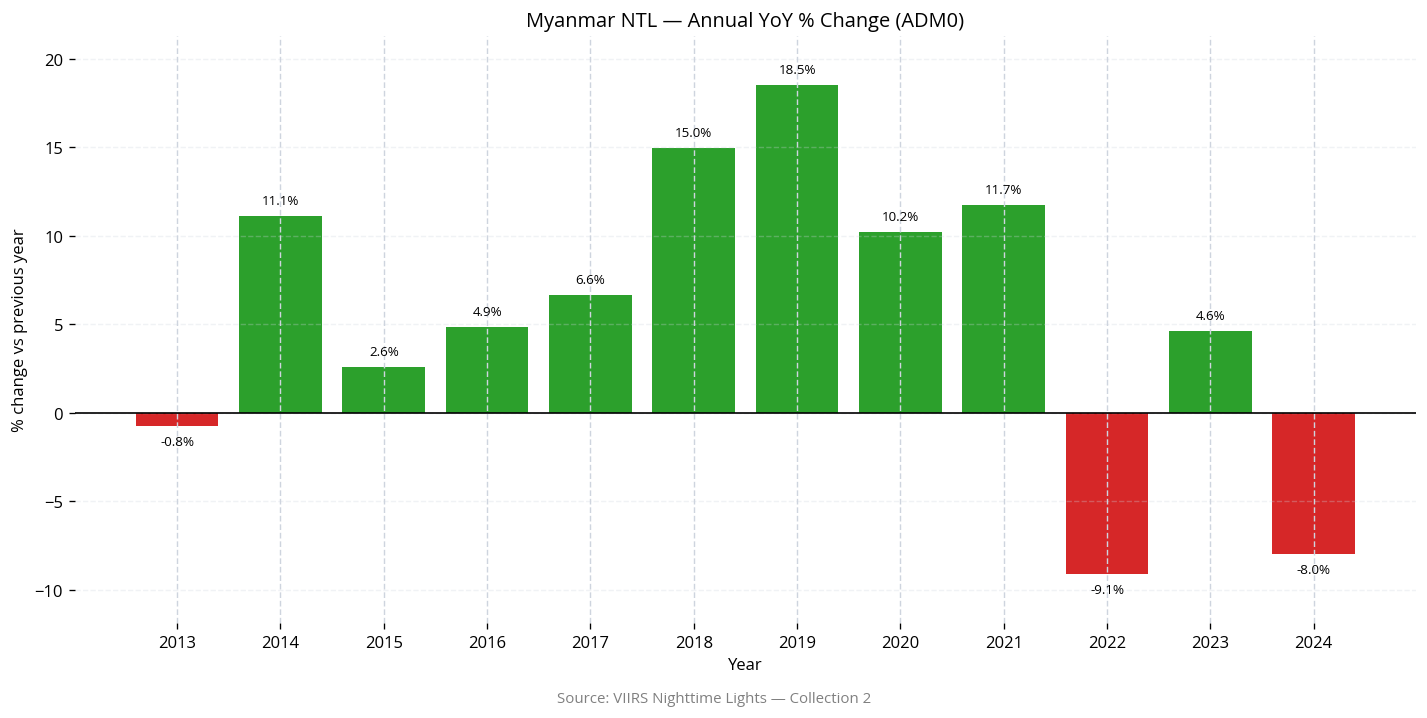

In [45]:
# Annual YoY % change plot (each year vs previous year) using plain Matplotlib (no wbpyplot)
import matplotlib.pyplot as plt

source_text = 'Source: VIIRS Nighttime Lights — Collection 2'

# Compute YoY from ADM0 annual
ann_df = ntl_annual_adm0.copy()
date_cand_ann = 'date' if 'date' in ann_df.columns else None
yoy = annual_ntl_pct_change(
    ann_df,
    year_col='year',
    value_col='ntl_sum',
    date_col=date_cand_ann,
    mode='yoy'
)
plot_df = yoy.dropna(subset=['prev_year_value']).copy()

# Plot
fig, ax = plt.subplots(figsize=(12, 6), dpi=120)
colors = ['#2ca02c' if v >= 0 else '#d62728' for v in plot_df['pct_change']]
x = plot_df['year'].astype(int)
y = plot_df['pct_change'].astype(float)
ax.bar(x, y, color=colors)

# 0% reference and y-grid
ax.axhline(0, color='black', linewidth=1)
ax.grid(True, axis='y', linestyle='--', alpha=0.3)

# Labels and title
ax.set_xlabel('Year')
ax.set_ylabel('% change vs previous year')
ax.set_title('Myanmar NTL — Annual YoY % Change (ADM0)')
ax.set_xticks(x)
ax.set_xticklabels([str(int(_)) for _ in x])

# Ensure negative values are visible: dynamic y-limits with padding
if len(y):
    ymin, ymax = float(y.min()), float(y.max())
    if ymin == ymax:
        pad = 1.0 if ymin == 0 else abs(ymin) * 0.1
        ax.set_ylim(ymin - pad, ymax + pad)
    else:
        pad = (ymax - ymin) * 0.1
        ax.set_ylim(ymin - pad, ymax + pad)

# Optional bar labels
for xi, yi in zip(x, y):
    ax.text(xi, yi + (0.5 if yi >= 0 else -0.5), f'{yi:.1f}%',
            ha='center', va='bottom' if yi >= 0 else 'top', fontsize=8)

# Source note
fig.text(0.5, 0.01, source_text, ha='center', va='bottom', fontsize=9, color='gray')

plt.tight_layout(rect=[0, 0.03, 1, 1])
plt.show()

In [12]:
# Function: subnational percentage change with baseline year or YoY
import pandas as pd
from typing import Optional, Literal

def subnational_pct_change(
    df: pd.DataFrame,
    region_col: str,
    *,
    baseline_year: Optional[int] = None,
    mode: Literal['baseline','yoy'] = 'baseline',
    year_col: str = 'year',
    date_col: Optional[str] = None,
    value_col: Optional[str] = None,
    current_year: Optional[int] = None,
) -> pd.DataFrame:
    """
    Compute subnational NTL percentage change by region.

    Parameters:
    - df: tidy table with at least region + year/date + value columns
    - region_col: column indicating region (ADM1/ADM2/ADM3 name or code)
    - baseline_year: baseline year for mode='baseline' (required for baseline mode)
    - mode: 'baseline' (region's current vs baseline year) or 'yoy' (region's year vs previous year)
    - year_col: explicit year column name if present (default 'year')
    - date_col: if provided (or if 'date' exists), derive year from dates
    - value_col: column to use for values; if None, will try pick_value_column(df)
    - current_year: for baseline mode, which year to compare to; default = region's max available year

    Returns:
    - mode='baseline': one row per region with [region, baseline_year, current_year, baseline_value, current_value, pct_change]
    - mode='yoy': per region-year rows with [region, year, value, prev_year_value, pct_change]
    """
    if value_col is None:
        value_col = pick_value_column(df)
    if value_col is None:
        raise ValueError('Could not determine value column')

    work = df.copy()

    # Ensure region exists
    if region_col not in work.columns:
        raise ValueError(f"region_col '{region_col}' not found in DataFrame")

    # Establish a year column
    detected_year_col = None
    if date_col and date_col in work.columns:
        work['year'] = pd.to_datetime(work[date_col]).dt.year
        detected_year_col = 'year'
    elif 'date' in work.columns:
        work['year'] = pd.to_datetime(work['date']).dt.year
        detected_year_col = 'year'
    elif year_col in work.columns:
        detected_year_col = year_col
    else:
        for cand in ['year', 'Year', 'YEAR', 'yr', 'Yr', 'YR']:
            if cand in work.columns:
                detected_year_col = cand
                break
        if detected_year_col is None:
            raise ValueError('Could not determine year column; provide date_col or year_col')

    # Aggregate to one value per region-year
    agg = (work[[region_col, detected_year_col, value_col]]
           .dropna()
           .groupby([region_col, detected_year_col], as_index=False)[value_col].mean()
           .rename(columns={detected_year_col: 'year'}))

    if mode == 'yoy':
        agg = agg.sort_values([region_col, 'year']).reset_index(drop=True)
        agg['prev_year_value'] = agg.groupby(region_col)[value_col].shift(1)
        def safe_pct(curr, prev):
            try:
                return (curr - prev) / prev * 100 if pd.notnull(prev) and prev != 0 else float('nan')
            except Exception:
                return float('nan')
        agg['pct_change'] = agg.apply(lambda r: safe_pct(r[value_col], r['prev_year_value']), axis=1)
        return agg[[region_col, 'year', value_col, 'prev_year_value', 'pct_change']]

    # baseline mode
    if baseline_year is None:
        raise ValueError("baseline_year is required for mode='baseline'")

    # Current year per region (max unless specified)
    if current_year is None:
        curr = (agg.sort_values(['year'])
                  .groupby(region_col, as_index=False)
                  .tail(1)
                  .rename(columns={value_col: 'current_value'}))
    else:
        curr = (agg.loc[agg['year'] == int(current_year), [region_col, 'year', value_col]]
                  .rename(columns={value_col: 'current_value'}))
        curr = curr.assign(current_year=curr['year']).drop(columns=['year'])

    base = (agg.loc[agg['year'] == int(baseline_year), [region_col, value_col]]
              .rename(columns={value_col: 'baseline_value'}))

    out = curr.merge(base, on=region_col, how='left')

    def safe_pct2(curr, basev):
        try:
            return (curr - basev) / basev * 100 if pd.notnull(basev) and basev != 0 else float('nan')
        except Exception:
            return float('nan')

    if 'current_year' not in out.columns:
        out = out.rename(columns={'year': 'current_year'})

    out['baseline_year'] = int(baseline_year)
    out['pct_change'] = out.apply(lambda r: safe_pct2(r['current_value'], r['baseline_value']), axis=1)

    return out[[region_col, 'baseline_year', 'current_year', 'baseline_value', 'current_value', 'pct_change']]

In [34]:
ntl_monthly_adm4['date'] = pd.to_datetime(ntl_monthly_adm4['date'])
ntl_monthly_agg_adm4 = ntl_monthly_adm4.groupby(['ADM4_EN',pd.Grouper(key='date', freq='YS'), 'ADM4_PCODE'], as_index=False)['ntl_sum'].mean()

ntl_monthly_adm3['date'] = pd.to_datetime(ntl_monthly_adm3['date'])
ntl_monthly_agg_adm3 = ntl_monthly_adm3.groupby(['ADM3_EN',pd.Grouper(key='date', freq='YS'), 'ADM3_PCODE'], as_index=False)['ntl_sum'].mean()

In [14]:
mmr_adm0 = gpd.read_file(DATA_FOLDER / 'boundaries' / 'mmr_polbnda_adm0_250k_mimu_20240215.shp')
mmr_adm1 = gpd.read_file(DATA_FOLDER / 'boundaries' / 'mmr_polbnda_adm1_250k_mimu_20240215.shp')
mmr_adm2 = gpd.read_file(DATA_FOLDER / 'boundaries' / 'mmr_polbnda_adm2_250k_mimu_20240215.shp')
mmr_adm3 = gpd.read_file(DATA_FOLDER / 'boundaries' / 'mmr_polbnda_adm3_250k_mimu_20240215.shp')
mmr_adm4 = gpd.read_file(DATA_FOLDER / 'boundaries' / 'mmr_polbnda_adm4_250k_mimu_20240215.shp')

In [39]:
pc_adm4 = subnational_pct_change(ntl_monthly_agg_adm4, 
                       region_col='ADM4_PCODE', 
                       baseline_year=2022, 
                       current_year=2025,
                       mode='baseline', 
                       value_col='ntl_sum')[['ADM4_PCODE','baseline_year', 'current_year', 'current_value', 'pct_change']]

pc_adm3 = subnational_pct_change(ntl_monthly_agg_adm3, 
                       region_col='ADM3_PCODE', 
                       baseline_year=2022, 
                       current_year=2025,
                       mode='baseline', 
                       value_col='ntl_sum')[['ADM3_PCODE','baseline_year', 'current_year', 'current_value', 'pct_change']]
pc_adm3 = mmr_adm3[['ADM3_EN', 'geometry', 'ADM3_PCODE']].merge(pc_adm3, on='ADM3_PCODE', how='inner')

/var/folders/gs/_227cnyd0pq1fr817_0jbcyw0000gp/T/ipykernel_87311/1568446717.py:19: UserWarning: Glyph 8594 (\N{RIGHTWARDS ARROW}) missing from font(s) Open Sans.
  plt.tight_layout()
/Users/ssarva/Library/Python/3.13/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8594 (\N{RIGHTWARDS ARROW}) missing from font(s) Open Sans.
  fig.canvas.print_figure(bytes_io, **kw)


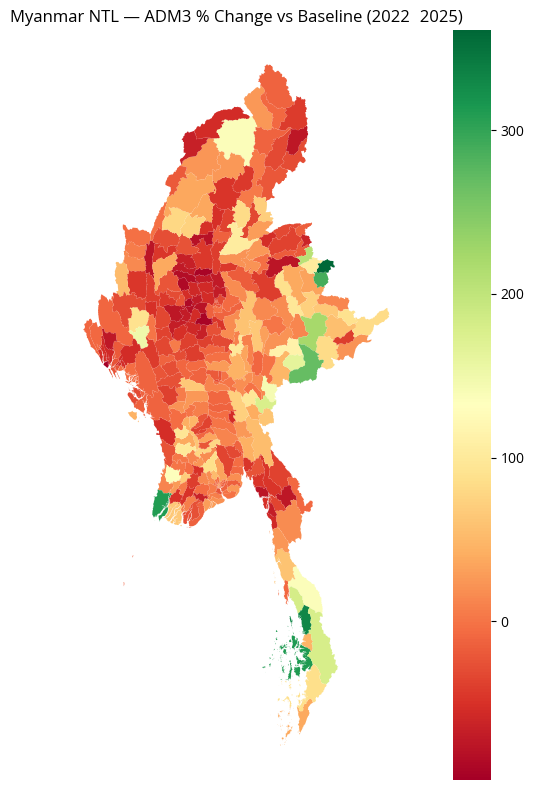

In [42]:
# Plot ADM3 baseline % change map with clean styling
ax = pc_adm3.plot(column='pct_change', cmap='RdYlGn', legend=True, figsize=(10, 8))

# Remove background grid and ticks/axes only for the map
ax.grid(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('')
ax.set_ylabel('')
for spine in ax.spines.values():
    spine.set_visible(False)

# Match font style with other charts and add a title
import matplotlib.pyplot as plt
_ff = plt.rcParams.get('font.family', ['sans-serif'])
font_family = _ff[0] if isinstance(_ff, (list, tuple)) else _ff
ax.set_title('Myanmar NTL — ADM3 % Change vs Baseline (2022→2025)', fontfamily=font_family)

plt.tight_layout()
plt.show()

In [54]:
ntl_annual_adm1['date'] = pd.to_datetime(ntl_annual_adm1['date'])
ntl_annual_adm1['year'] = ntl_annual_adm1['date'].dt.year

ntl_monthly_adm1['date'] = pd.to_datetime(ntl_monthly_adm1['date'])
ntl_monthly_agg_adm1 = ntl_monthly_adm1.groupby(['ADM1_PCODE', 'ADM1_EN', pd.Grouper(key='date', freq='YS')])['ntl_sum'].mean().reset_index()
ntl_monthly_agg_adm1['year'] = ntl_monthly_agg_adm1['date'].dt.year

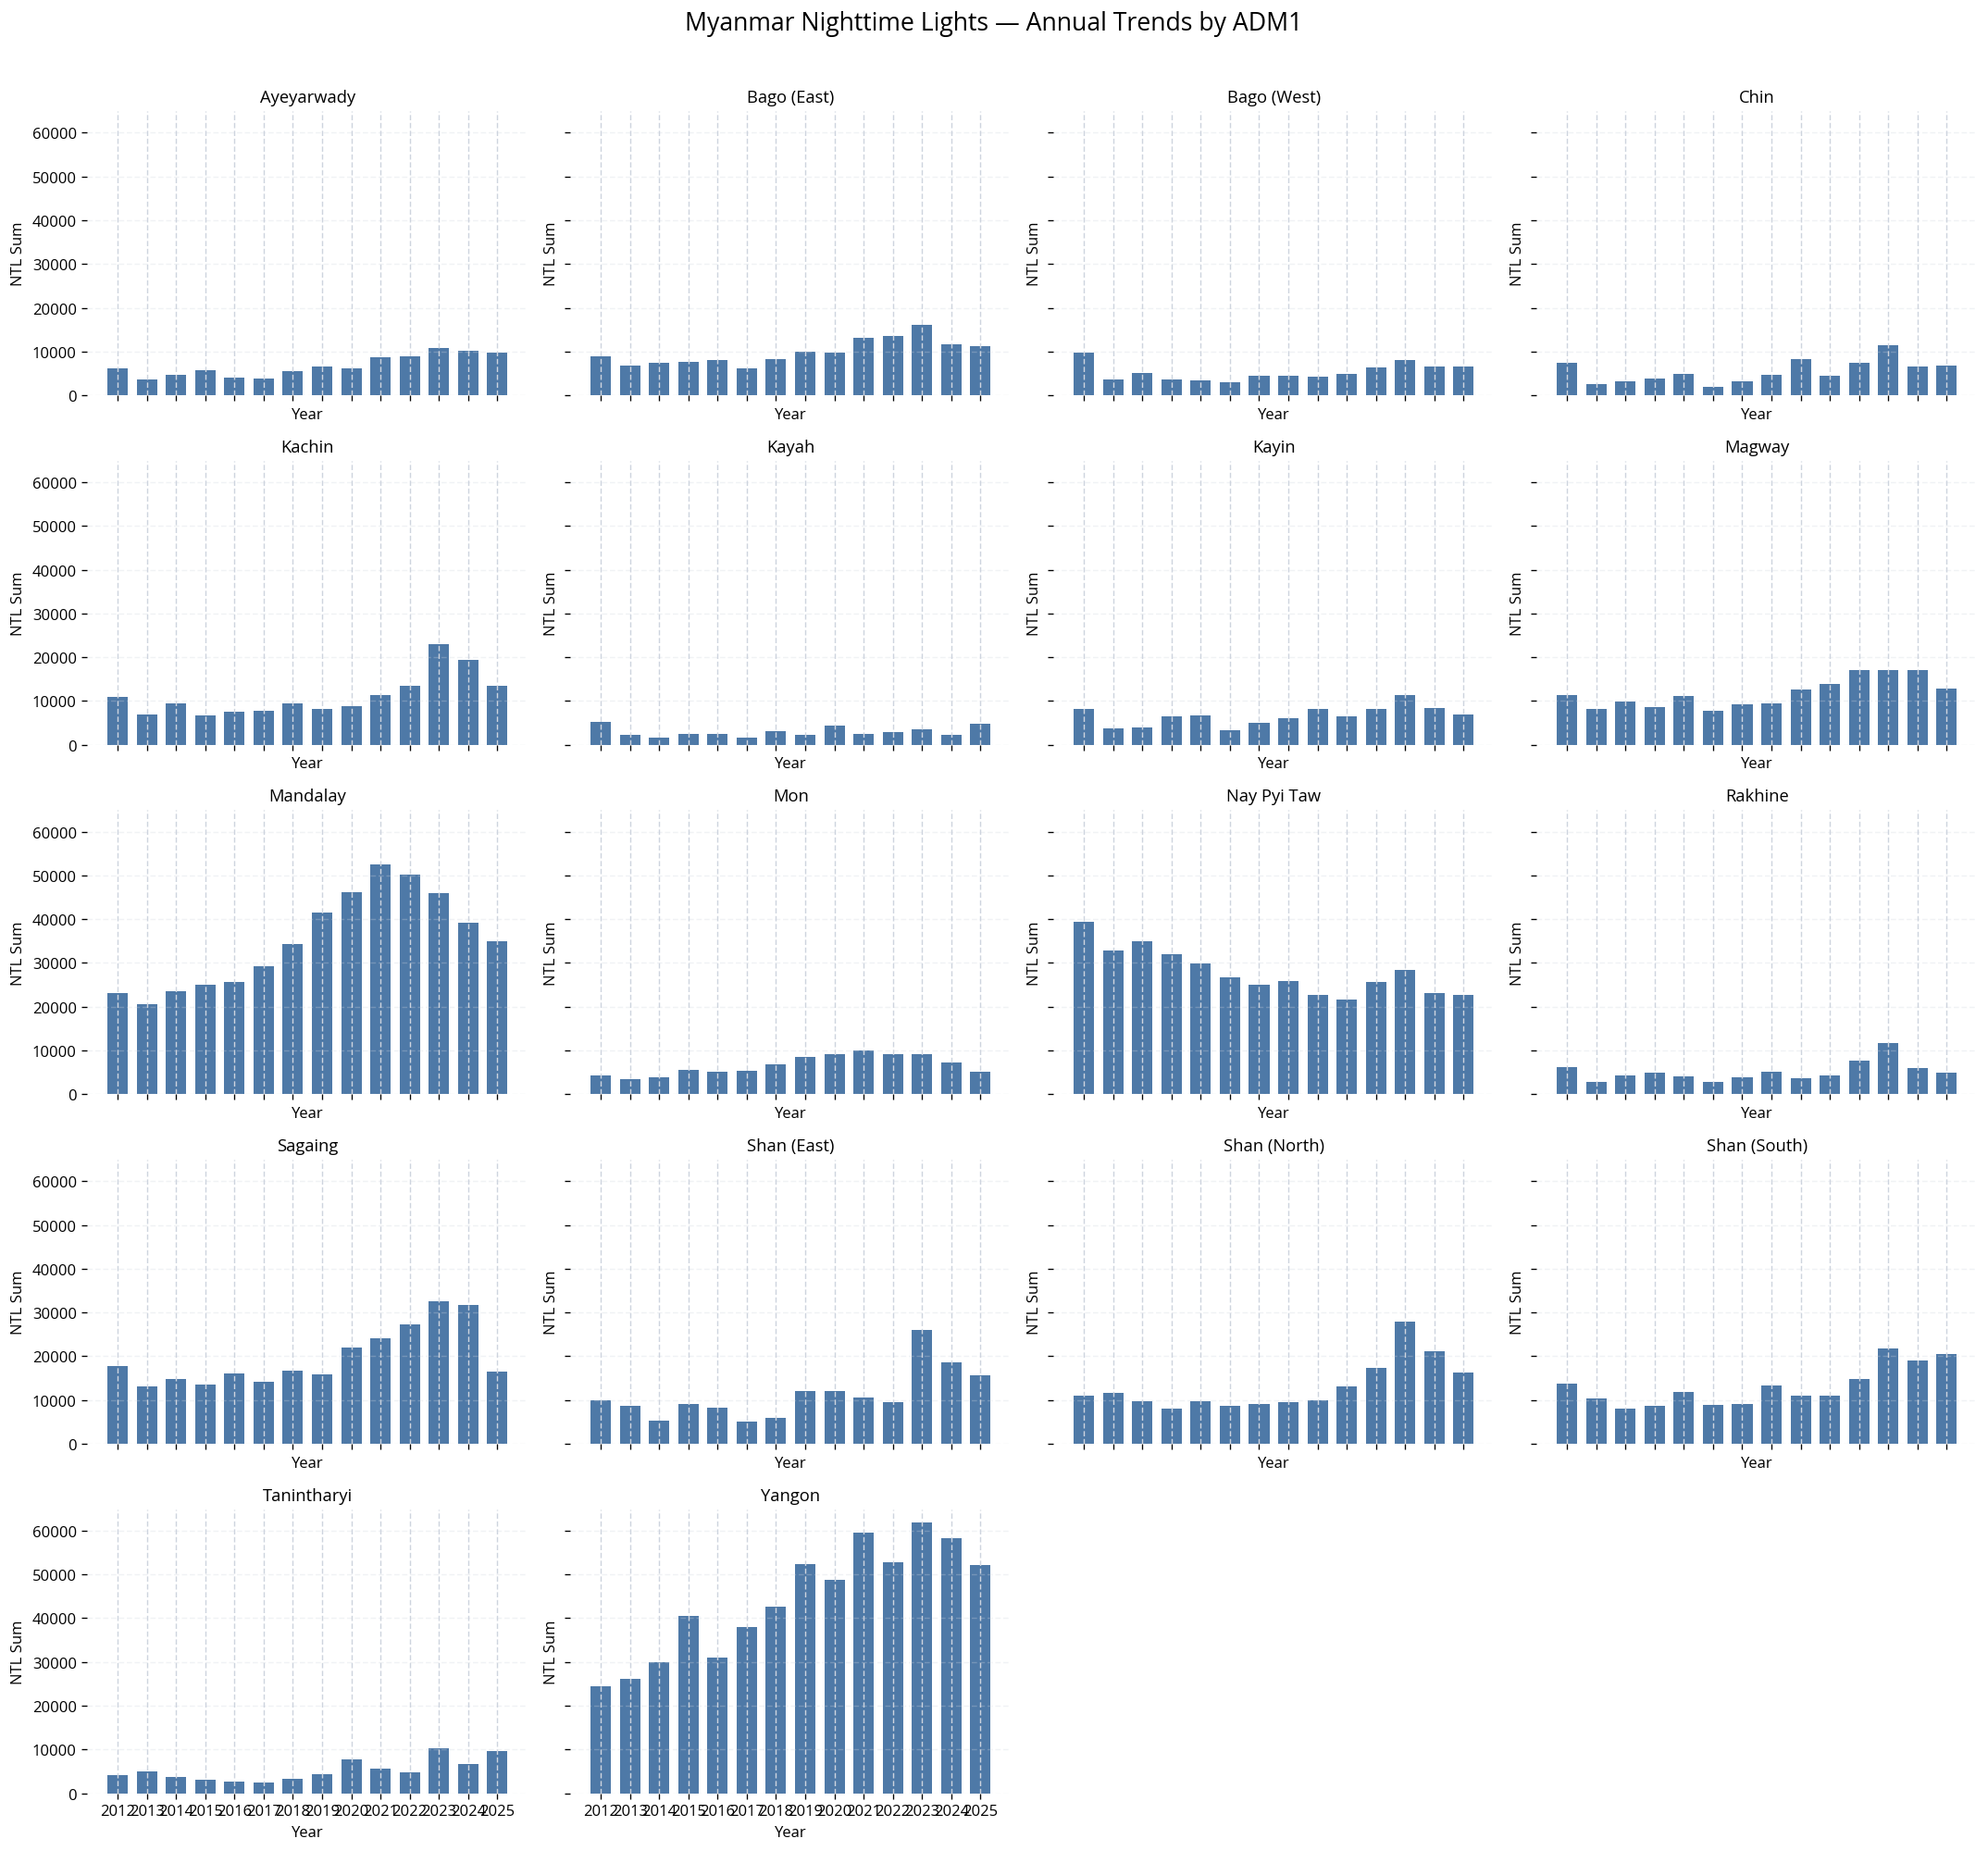

In [57]:
# Subplots: NTL annual trend for each ADM1 region (bar charts)
import matplotlib.pyplot as plt
import numpy as np

# Ensure columns
assert 'ADM1_EN' in ntl_monthly_agg_adm1.columns, "ADM1_EN column not found"
assert 'year' in ntl_monthly_agg_adm1.columns, "year column not found"
assert 'ntl_sum' in ntl_monthly_agg_adm1.columns, "ntl_sum column not found"

adm1_list = sorted(ntl_monthly_agg_adm1['ADM1_EN'].dropna().unique())
n_adm1 = len(adm1_list)
ncols = 4
nrows = int(np.ceil(n_adm1 / ncols))
fig, axs = plt.subplots(nrows, ncols, figsize=(4.5*ncols, 3.5*nrows), sharex=True, sharey=True, dpi=120)
axs = axs.flatten()

for i, adm1 in enumerate(adm1_list):
    sub = ntl_monthly_agg_adm1[ntl_monthly_agg_adm1['ADM1_EN'] == adm1]
    x = sub['year'].astype(int)
    y = sub['ntl_sum']
    axs[i].bar(x, y, color='#4e79a7', width=0.7)
    axs[i].set_title(adm1, fontsize=11)
    axs[i].set_xlabel('Year')
    axs[i].set_ylabel('NTL Sum')
    axs[i].grid(True, axis='y', alpha=0.3)
    axs[i].set_xticks(x)
    axs[i].set_xticklabels([str(xx) for xx in x], rotation=0)

# Hide unused axes
for j in range(n_adm1, len(axs)):
    axs[j].axis('off')

fig.suptitle('Myanmar Nighttime Lights — Annual Trends by ADM1', fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()